# Imbalanced data handling

## Random over sampling
is used to handle the class imbalance problem in the dataset.


In [778]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from mlxtend.plotting import plot_decision_regions
import matplotlib.pyplot as plt

In [779]:
dataset = pd.read_csv(r"/Users/adityagoyal/Downloads/Dataset/Social_Network_ads.csv")
dataset.head(3)

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0


In [780]:
dataset["Purchased"].value_counts()


Purchased
0    257
1    143
Name: count, dtype: int64

In [781]:
x = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [782]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [783]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

In [784]:
lr.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [785]:
lr.score(X_test, y_test)*100

88.75

# using imblearn for random sample


In [786]:
dataset1 = pd.read_csv(r"/Users/adityagoyal/Downloads/Dataset/Social_Network_ads.csv")
dataset1.head(3)

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0


In [787]:
from imblearn.under_sampling import RandomUnderSampler

In [788]:
x = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [789]:
ru = RandomUnderSampler(random_state=5)
X_resampled, y_resampled = ru.fit_resample(x, y)

In [790]:
pd.Series(y_resampled).value_counts()

0    143
1    143
Name: count, dtype: int64

In [791]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

In [792]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

In [793]:
lr.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [794]:
lr.score(X_test, y_test)*100

79.3103448275862

In [795]:
dataset = pd.read_csv(r"/Users/adityagoyal/Downloads/Dataset/Placement1.csv")
dataset.head(3)

,Unnamed: 0,cgpa,iq,placement
0,0,6.8,123.0,1
1,1,5.9,106.0,0
2,2,5.3,121.0,0


In [796]:
dataset.drop(columns="Unnamed: 0", inplace=True)

In [797]:
from imblearn.under_sampling import RandomUnderSampler


In [798]:
x = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [799]:
pd.Series(y).value_counts()

1    50
0    50
Name: count, dtype: int64

In [800]:
ru = RandomUnderSampler(random_state=5)
X_resampled, y_resampled = ru.fit_resample(X_train, y_train)

In [801]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

In [802]:
lr.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [803]:
lr.score(X_test, y_test)*100

77.27272727272727

in this dataset when we normally use logistic regression our accuracy is 58% but with random samler we get 75% accuracy
and with adugesic random state we get accuracy 80%

# Random Over Sampling
The first step in the reconstruction process is to oversample the data.
The oversampling process is done by randomly selecting the same number of data points from the minority class as
the number of data points in the majority class.


In [804]:
dataset = pd.read_csv(r"/Users/adityagoyal/Downloads/Dataset/Social_Network_ads.csv")
dataset.head(3)

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0


In [805]:
from imblearn.over_sampling import RandomOverSampler

In [806]:
x = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [807]:
ro_x , ro_y = RandomOverSampler(random_state=5).fit_resample(x, y)

In [808]:
pd.Series(ro_y).value_counts()

0    257
1    257
Name: count, dtype: int64

In [809]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(ro_x, ro_y, test_size=0.2, random_state=42)

In [810]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

In [811]:
lr.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [812]:
lr.score(X_test, y_test)
lr.score(X_test, y_test)*100

86.40776699029125

# Naive Bayes Algo
is used to classify the data into one of the two classes.
The Naive Bayes algorithm is a type of supervised learning algorithm that is based on Bayes'
theorem. It is a probabilistic classifier that uses Bayes' theorem to calculate the probability of a
data point belonging to a particular class.
The Naive Bayes algorithm is a type of supervised learning algorithm that is based on Bayes'
theorem. It is a probabilistic classifier that uses Bayes' theorem to calculate the probability of a
data point belonging to a particular class.


There are 3 types of naive bayes
### 1. Gaussian Naive Bayes
is used when the data is continuous and follows a normal distribution.
### 2. Multinomial Naive Bayes
is used when the data is discrete and follows a multinomial distribution.
### 3. Bernoulli Naive Bayes
is used when the data is binary.
### 4. Complement Naive Bayes
is used when the data is binary and the probability of a positive class is low.


In [813]:
dataset = pd.read_csv(r"/Users/adityagoyal/Downloads/Dataset/Placement.csv")
dataset.head(5)

,Student_ID,CGPA,IQ,Placement
0,1,6.8,123,1
1,2,5.9,106,0
2,3,5.3,121,0
3,4,7.4,132,1
4,5,5.8,142,0


In [814]:
dataset.drop(["Student_ID"], axis=1, inplace=True)

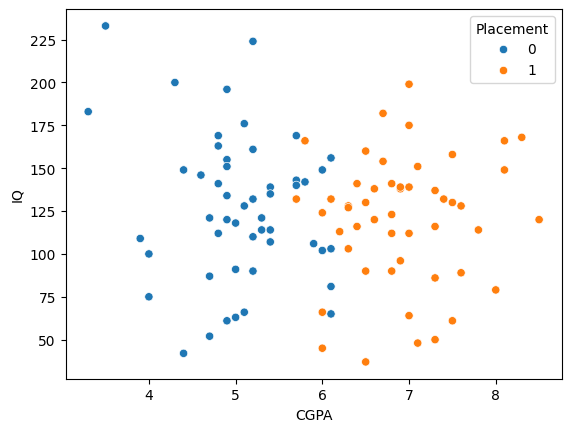

In [815]:
sns.scatterplot(x="CGPA", y="IQ", hue="Placement", data=dataset)
plt.show()


In [816]:
x = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [817]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [818]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

In [819]:
lr.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


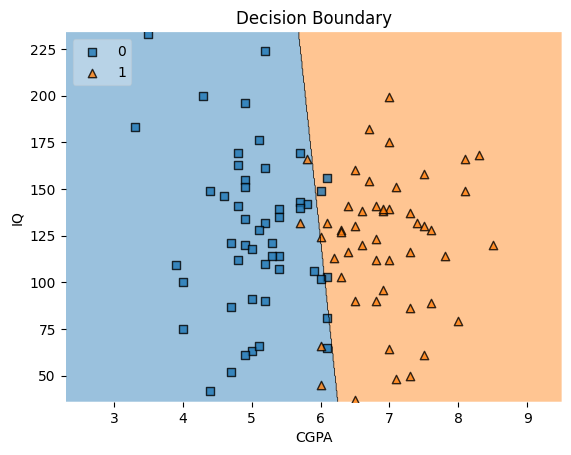

In [820]:
plot_decision_regions(x, y, clf=lr, legend=2)
plt.xlabel("CGPA")
plt.ylabel("IQ")
plt.title("Decision Boundary")
plt.show()

Text(0.5, 1.0, 'KDE Plot of CGPA and IQ by Placement')

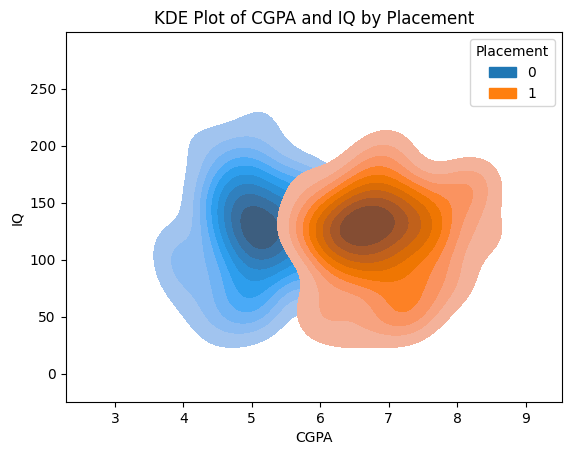

In [821]:
sns.kdeplot(x=dataset["CGPA"], y=dataset["IQ"], hue=dataset["Placement"], fill=True, thresh=0.1)
plt.title("KDE Plot of CGPA and IQ by Placement")

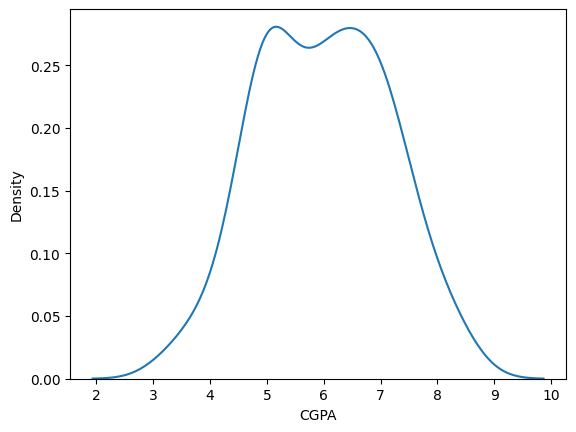

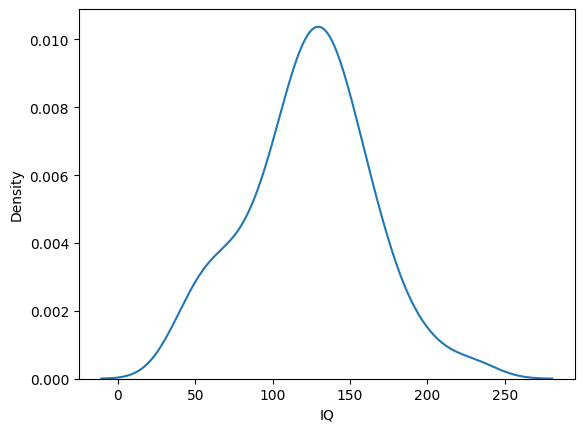

In [822]:
sns.kdeplot(x=dataset["CGPA"])
plt.show()
sns.kdeplot(x=dataset["IQ"])
plt.show()

In [823]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)

,priors,None
,var_smoothing,1e-09


In [824]:
gnb.score(X_test, y_test)*100 , gnb.score(X_train, y_train)*100

(85.0, 91.25)

In [825]:
mul = MultinomialNB()
mul.fit(X_train, y_train)

,alpha,1.0
,force_alpha,True
,fit_prior,True
,class_prior,None


In [826]:
mul.score(X_test, y_test)*100 , mul.score(X_train, y_train)*100

(95.0, 70.0)

In [827]:
ber = BernoulliNB()
ber.fit(X_train, y_train)

,alpha,1.0
,force_alpha,True
,binarize,0.0
,fit_prior,True
,class_prior,None


In [828]:
ber.score(X_test, y_test)*100 , ber.score(X_train, y_train)*100

(50.0, 50.0)

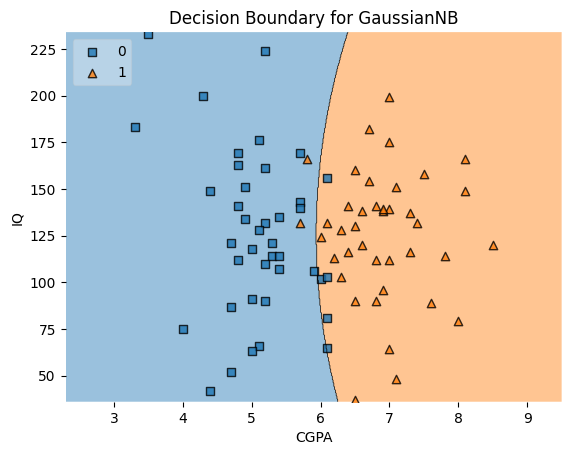

In [829]:
plot_decision_regions(X_train, y_train, clf=gnb, legend=2)
plt.xlabel("CGPA")
plt.ylabel("IQ")
plt.title("Decision Boundary for GaussianNB")
plt.show()

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


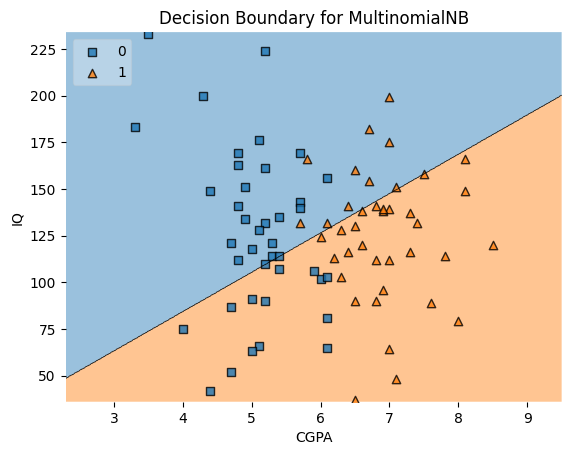

In [830]:
plot_decision_regions(X_train, y_train, clf=mul, legend=2)
plt.xlabel("CGPA")
plt.ylabel("IQ")
plt.title("Decision Boundary for MultinomialNB")
plt.show()

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


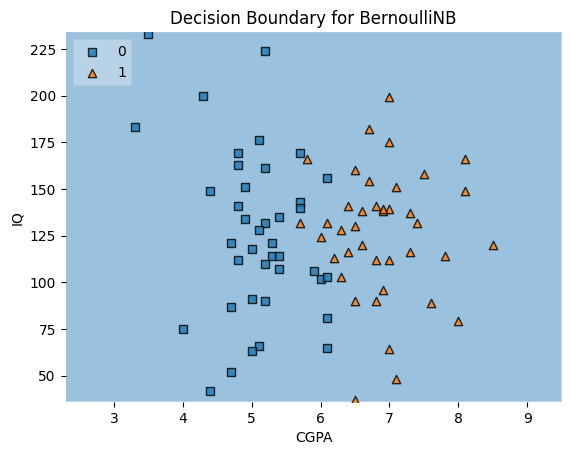

In [831]:
plot_decision_regions(X_train, y_train, clf=ber, legend=2)
plt.xlabel("CGPA")
plt.ylabel("IQ")
plt.title("Decision Boundary for BernoulliNB")
plt.show()

In [832]:
y_test[:5]

array([1, 1, 1, 1, 1])

In [833]:
gnb.predict_proba(X_test)[:5]
gnb.predict(X_test)[:5]

array([1, 1, 1, 0, 1])

In [834]:
mul.predict_proba(X_test)[:5]
mul.predict(X_test)[:5]

array([1, 1, 1, 1, 1])

In [835]:
ber.score(X_test, y_test)*100
ber.predict_proba(X_test)[:5]
ber.predict(X_test)[:5]

array([0, 0, 0, 0, 0])

# Non Linear Supervised Algorithm
## 1. Tree based Algo
### 1. Decision Tree
used for classification and regression tasks. It works by recursively partitioning the data into smaller subsets based on the values of the input features.
### 2. Random Forest
used for classification and regression tasks. It works by combining multiple decision trees to improve the accuracy and robust
### 3. Gradient Boosting
used for classification and regression tasks. It works by combining multiple weak models to create a strong predictive model
## 2.Kernal Based Algo
### Support Vector Machine (SVM)
used for classification and regression tasks. It works by finding the hyperplane that maximally separates the classes
## 3. K-Nearest Neighbors (KNN)
used for classification and regression tasks. It works by finding the k most similar instances in the training data
## 4. Neural Network
used for classification and regression tasks. It works by learning complex patterns in the data through multiple layers of non-linear transformations
### 1. Convolutional Neural Network (CNN)
used for image classification and object detection tasks. It works by using convolutional and pooling layers to extract features from images 
### 2. Recurrent Neural Network (RNN)
used for time series forecasting and natural language processing tasks. It works by using recurrent connections to capture temporal dependencies 
### 3. Long Short-Term Memory (LSTM)
used for time series forecasting and natural language processing tasks. It works by using memory cells to capture long-term dependencies
### 4. Multilayer Perceptron(MLP)
used for classification and regression tasks. It works by using multiple layers of artificial neurons to learn complex patterns in the data





### pruning
is the process of removing unnecessary or redundant parts from a model to improve its efficiency and performance. This can involve techniques such as weight pruning, where small weights are set to zero, or neuron pruning, where entire neurons are removed from the network.
### quantization
is the process of reducing the precision of the numbers used to represent model parameters, typically by converting floating-point numbers to lower-bit integers. This can lead to significant reductions in model size and improvements in inference speed, especially on hardware with limited computational resources.   


In [836]:
dataset = pd.read_csv(r"/Users/adityagoyal/Downloads/Dataset/Social_Network_ads.csv")
dataset.head(3)

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0


In [837]:
dataset.isnull().sum()

Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [838]:
x = dataset.drop(columns=[ "Purchased"]).values
y = dataset["Purchased"].values

In [839]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(x)

,copy,True
,with_mean,True
,with_std,True


In [840]:
x = pd.DataFrame(sc.transform(x), columns=dataset.columns[:-1])

In [841]:
x

,Age,EstimatedSalary
0,-1.781797,-1.490046
1,-0.253587,-1.460681
2,-1.113206,-0.785290
3,-1.017692,-0.374182
4,-1.781797,0.183751
...,...,...
395,0.797057,-0.844019
396,1.274623,-1.372587
397,1.179110,-1.460681
398,-0.158074,-1.078938


In [842]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [843]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=42, splitter='best')
dt.fit(x_train, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [844]:
dt.score(x_test, y_test)*100

83.75

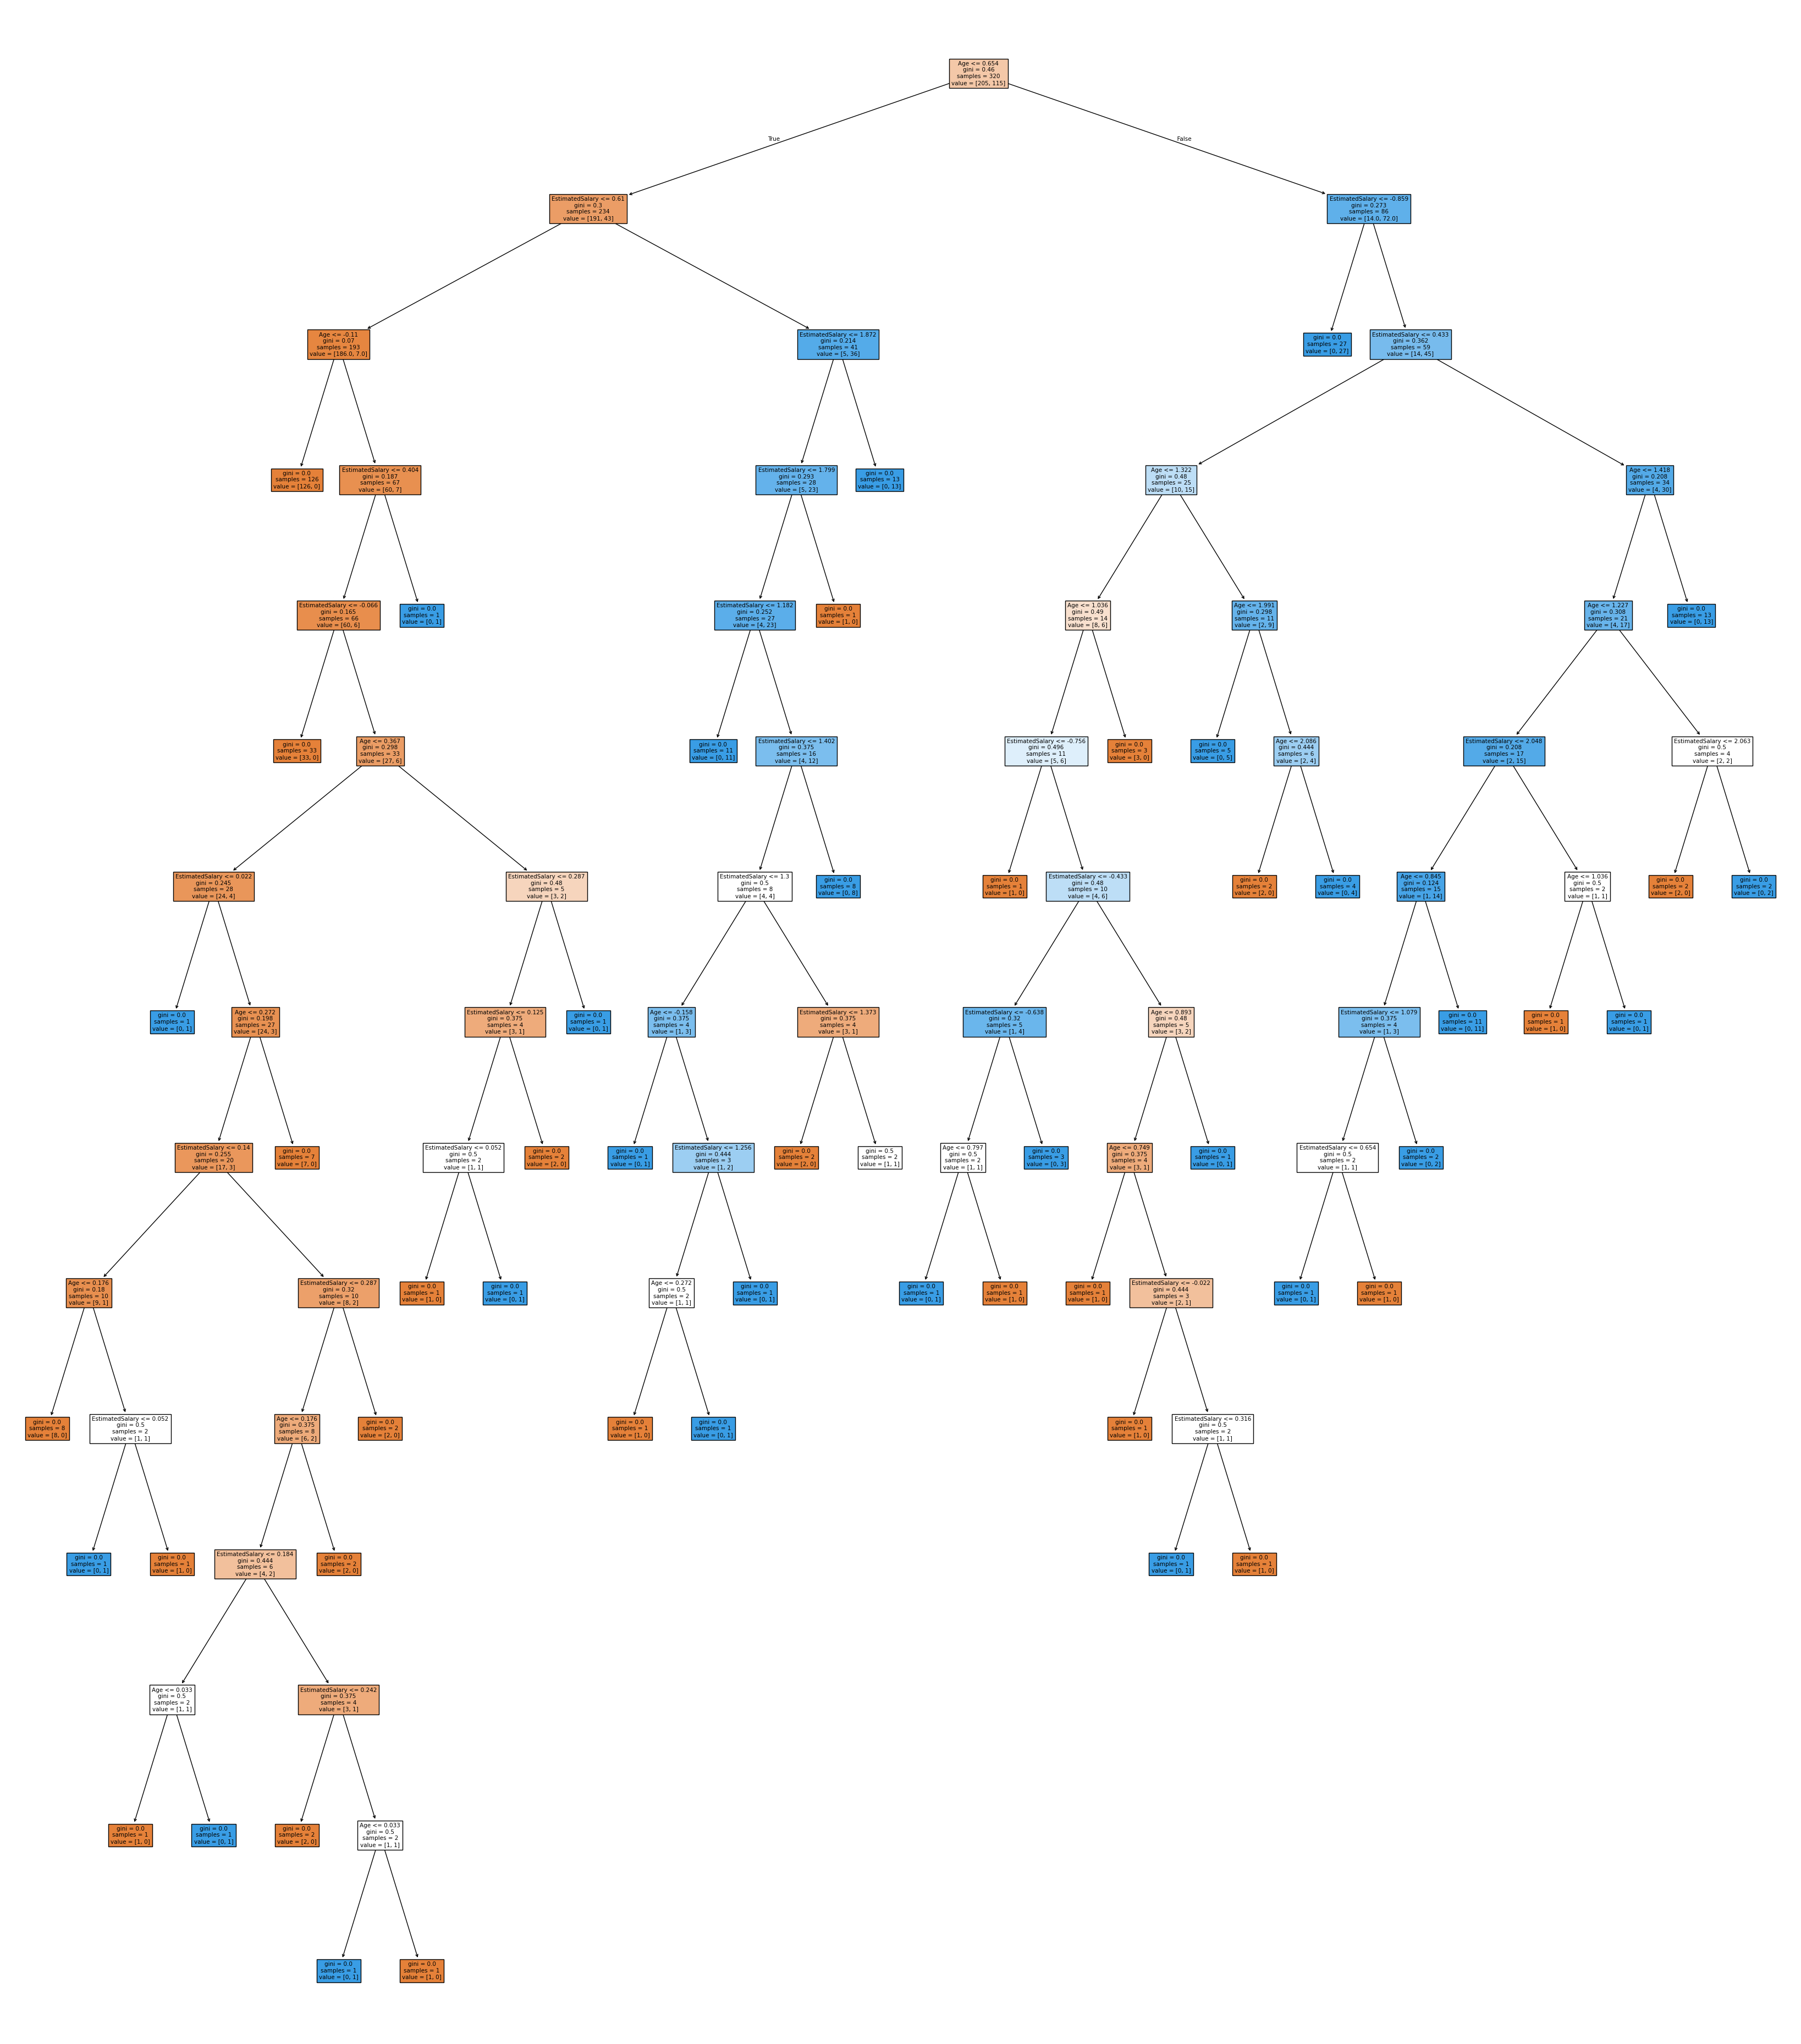

In [845]:
from sklearn.tree import plot_tree

plt.figure(figsize=(42,48))
plot_tree(dt, filled=True, feature_names=dataset.columns[:-1])
plt.show()

### Pre Pruning

In [846]:
dt1 = DecisionTreeClassifier(max_depth=5 , criterion='entropy', random_state=42)
dt1.fit(x_train, y_train)

,criterion,'entropy'
,splitter,'best'
,max_depth,5
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [847]:
dt1.score(x_train, y_train)*100

93.125

In [848]:
dt1.score(x_test, y_test)*100

91.25

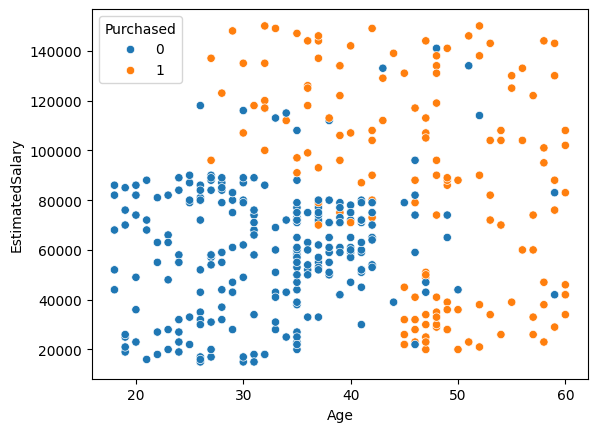

In [849]:
sns.scatterplot(x="Age", y="EstimatedSalary", hue="Purchased", data=dataset)
plt.show()

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


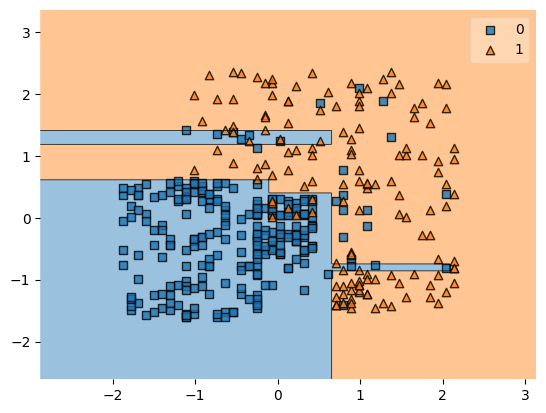

In [850]:
plot_decision_regions(x.values, y, clf=dt1)
plt.show()


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


<function matplotlib.pyplot.show(close=None, block=None)>

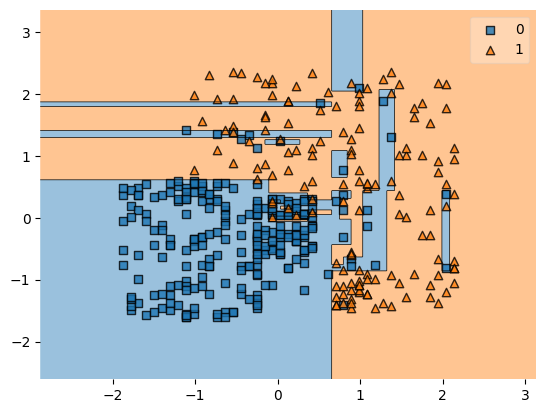

In [851]:
plot_decision_regions(x.values, y, clf=dt)
plt.show

### Pre Pruning Post Pruning
is a technique used in decision trees to prevent overfitting by stopping the growth of the tree at an early stage (pre-pruning) or by removing branches after the tree has been fully grown (post-pruning). Pre-pruning involves setting a maximum depth or minimum number of samples required to split a node, while post-pruning involves evaluating the performance of the tree on a validation set and removing branches that do not contribute significantly to accuracy.

### Post Pruning

In [852]:
for i in range(1, 20):
    dt1 = DecisionTreeClassifier(max_depth=i, random_state=42)
    dt1.fit(x_train, y_train)
    print(f"Max Depth: {i}, Training Accuracy: {dt1.score(x_train, y_train)*100:.2f}%", f"Testing Accuracy: {dt1.score(x_test, y_test)*100:.2f}%")

Max Depth: 1, Training Accuracy: 82.19% Testing Accuracy: 90.00%
Max Depth: 2, Training Accuracy: 91.88% Testing Accuracy: 91.25%
Max Depth: 3, Training Accuracy: 91.88% Testing Accuracy: 91.25%
Max Depth: 4, Training Accuracy: 93.12% Testing Accuracy: 91.25%
Max Depth: 5, Training Accuracy: 93.44% Testing Accuracy: 90.00%
Max Depth: 6, Training Accuracy: 95.00% Testing Accuracy: 86.25%
Max Depth: 7, Training Accuracy: 96.88% Testing Accuracy: 85.00%
Max Depth: 8, Training Accuracy: 97.50% Testing Accuracy: 85.00%
Max Depth: 9, Training Accuracy: 98.12% Testing Accuracy: 85.00%
Max Depth: 10, Training Accuracy: 98.44% Testing Accuracy: 85.00%
Max Depth: 11, Training Accuracy: 99.06% Testing Accuracy: 83.75%
Max Depth: 12, Training Accuracy: 99.06% Testing Accuracy: 83.75%
Max Depth: 13, Training Accuracy: 99.38% Testing Accuracy: 83.75%
Max Depth: 14, Training Accuracy: 99.69% Testing Accuracy: 83.75%
Max Depth: 15, Training Accuracy: 99.69% Testing Accuracy: 83.75%
Max Depth: 16, Trai

In [853]:
for i in range(1, 20):
    dt = DecisionTreeClassifier(max_depth=i, random_state=42)
    dt.fit(x_train, y_train)
    print(f"Max Depth: {i}, Training Accuracy: {dt1.score(x_train, y_train)*100:.2f}%", f"Testing Accuracy: {dt1.score(x_test, y_test)*100:.2f}%")

Max Depth: 1, Training Accuracy: 99.69% Testing Accuracy: 83.75%
Max Depth: 2, Training Accuracy: 99.69% Testing Accuracy: 83.75%
Max Depth: 3, Training Accuracy: 99.69% Testing Accuracy: 83.75%
Max Depth: 4, Training Accuracy: 99.69% Testing Accuracy: 83.75%
Max Depth: 5, Training Accuracy: 99.69% Testing Accuracy: 83.75%
Max Depth: 6, Training Accuracy: 99.69% Testing Accuracy: 83.75%
Max Depth: 7, Training Accuracy: 99.69% Testing Accuracy: 83.75%
Max Depth: 8, Training Accuracy: 99.69% Testing Accuracy: 83.75%
Max Depth: 9, Training Accuracy: 99.69% Testing Accuracy: 83.75%
Max Depth: 10, Training Accuracy: 99.69% Testing Accuracy: 83.75%
Max Depth: 11, Training Accuracy: 99.69% Testing Accuracy: 83.75%
Max Depth: 12, Training Accuracy: 99.69% Testing Accuracy: 83.75%
Max Depth: 13, Training Accuracy: 99.69% Testing Accuracy: 83.75%
Max Depth: 14, Training Accuracy: 99.69% Testing Accuracy: 83.75%
Max Depth: 15, Training Accuracy: 99.69% Testing Accuracy: 83.75%
Max Depth: 16, Trai

### Decision tree regression
is a type of decision tree that is used for predicting continuous values, rather than discrete classes. In a regression tree, the target variable is continuous, and the tree is constructed by splitting the data into subsets based on feature values, with the goal of minimizing the variance of the target variable within each subset.


In [854]:
dataset = pd.read_csv(r"/Users/adityagoyal/Downloads/Dataset/Salary_Data.csv")
dataset.head(3)

,YearsExperience,Age,Salary
0,1.1,21.0,39343
1,1.3,21.5,46205
2,1.5,21.7,37731


In [855]:
dataset.isnull().sum()

YearsExperience    0
Age                0
Salary             0
dtype: int64

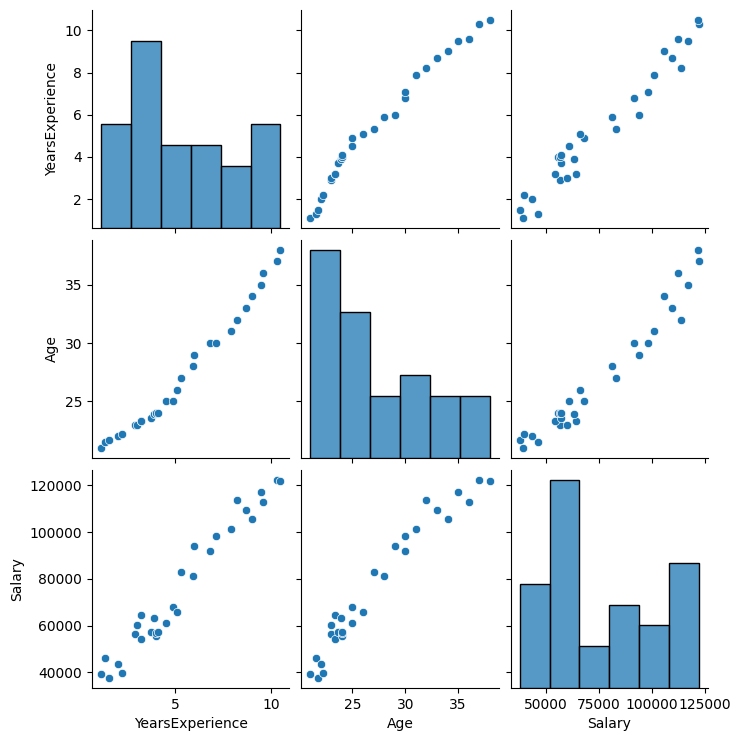

In [856]:
sns.pairplot(dataset)

In [857]:
x = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [858]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x)

,copy,True
,with_mean,True
,with_std,True


In [859]:
x = pd.DataFrame(sc.transform(x), columns=dataset.columns[:-1])

In [860]:
x

,YearsExperience,Age
0,-3.491482,-2.047362
1,-3.472380,-2.047347
2,-3.453277,-2.047341
3,-3.405521,-2.047332
4,-3.386418,-2.047327
5,-3.319559,-2.047303
6,-3.310007,-2.047303
7,-3.290905,-2.047294
8,-3.290905,-2.047294
9,-3.243148,-2.047285


In [861]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [862]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor(random_state=22, max_depth=5)

In [863]:
dt.fit(x_train, y_train)

,criterion,'squared_error'
,splitter,'best'
,max_depth,5
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,22
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,ccp_alpha,0.0


In [864]:
dt.score(x_test, y_test)*100 , dt.score(x_train, y_train)*100

(83.49077182121182, 99.75013592161555)

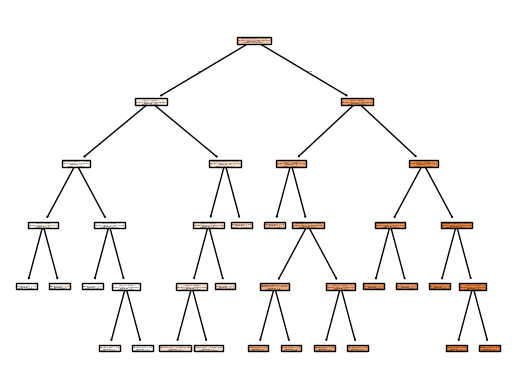

In [865]:
plot_tree(dt, filled=True, feature_names=dataset.columns[:-1])
plt.show()

### K-Nearest Neighbors
is a type of instance-based learning, or lazy learning, where the function is only approximated locally and all computation is deferred until function evaluation. The KNN algorithm is one of the simplest machine learning algorithms and is used for both classification and regression tasks. It is also called lazy learning.

There are 3 type of distances
### 1. Euclidean distance
Formula: √Σ(xi - yi)²
### 2. Manhattan distance
Formula: Σ|xi - yi|
### 3. Minkowski distance
Formula: (Σ|xi - yi|^p)^(1/p)

In [866]:
dataset = pd.read_csv(r"/Users/adityagoyal/Downloads/Dataset/Social_Network_ads.csv")
dataset.head(3)

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0


In [867]:
x = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

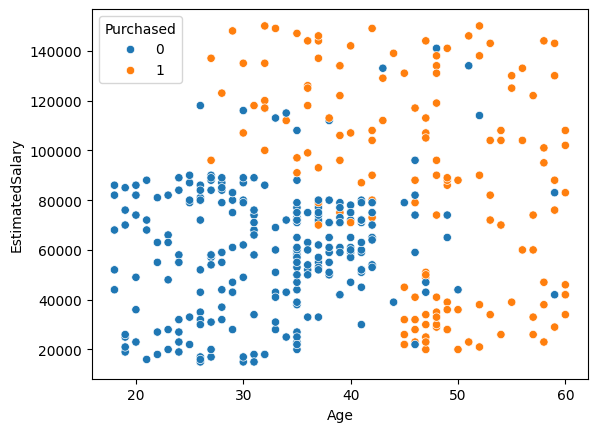

In [868]:
sns.scatterplot(x="Age", y="EstimatedSalary", hue="Purchased", data=dataset)
plt.show()

In [869]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x)


,copy,True
,with_mean,True
,with_std,True


In [870]:
x = pd.DataFrame(scaler.transform(x), columns=dataset.columns[:-1])

In [871]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


In [872]:
from sklearn.neighbors import KNeighborsClassifier


In [873]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train, y_train)


,n_neighbors,3
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [874]:
knn.score(x_test, y_test)*100 , knn.score(x_train, y_train)*100

(92.5, 92.5)

In [875]:
for i in range(1, 31):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train, y_train)
    print(f"Accuracy for k={i}: {knn.score(x_test, y_test)*100:.2f}%", knn.score(x_train, y_train)*100)


Accuracy for k=1: 85.00% 99.6875
Accuracy for k=2: 86.25% 91.5625
Accuracy for k=3: 92.50% 92.5
Accuracy for k=4: 92.50% 91.5625
Accuracy for k=5: 92.50% 90.9375
Accuracy for k=6: 90.00% 90.9375
Accuracy for k=7: 93.75% 91.875
Accuracy for k=8: 92.50% 90.625
Accuracy for k=9: 93.75% 91.25
Accuracy for k=10: 92.50% 90.625
Accuracy for k=11: 92.50% 90.9375
Accuracy for k=12: 92.50% 91.25
Accuracy for k=13: 92.50% 91.5625
Accuracy for k=14: 92.50% 90.625
Accuracy for k=15: 92.50% 90.625
Accuracy for k=16: 92.50% 90.0
Accuracy for k=17: 92.50% 90.3125
Accuracy for k=18: 92.50% 90.0
Accuracy for k=19: 92.50% 90.9375
Accuracy for k=20: 93.75% 90.0
Accuracy for k=21: 92.50% 90.3125
Accuracy for k=22: 93.75% 90.0
Accuracy for k=23: 93.75% 90.3125
Accuracy for k=24: 93.75% 89.375
Accuracy for k=25: 93.75% 90.0
Accuracy for k=26: 93.75% 89.375
Accuracy for k=27: 92.50% 89.375
Accuracy for k=28: 93.75% 88.75
Accuracy for k=29: 93.75% 88.75
Accuracy for k=30: 93.75% 89.0625


In [876]:
knn.predict_proba(x_test)[:5]

array([[0.2, 0.8],
       [0.2, 0.8],
       [1. , 0. ],
       [0.3, 0.7],
       [1. , 0. ]])

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


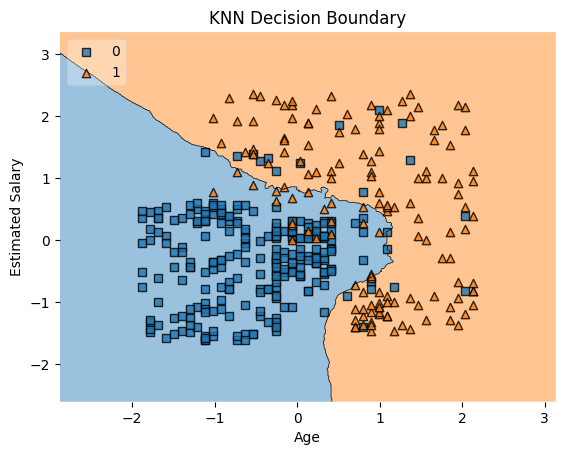

In [877]:
plot_decision_regions(x.values, y, clf=knn, legend=2)
plt.xlabel("Age")
plt.ylabel("Estimated Salary")
plt.title("KNN Decision Boundary")
plt.show()

### Knn Regression
is a type of supervised learning algorithm used for regression tasks. It predicts the target variable by finding the k-nearest neighbors in the feature space and averaging their target values.


In [878]:
dataset = pd.read_csv(r"/Users/adityagoyal/Downloads/Dataset/Salary_Data.csv")
dataset.head(3)

,YearsExperience,Age,Salary
0,1.1,21.0,39343
1,1.3,21.5,46205
2,1.5,21.7,37731


In [879]:
x = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [880]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [881]:
from sklearn.neighbors import KNeighborsRegressor


In [882]:
knn = KNeighborsRegressor(n_neighbors=3)
knn.fit(x_train, y_train)

,n_neighbors,3
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [883]:
knn.score(x_test, y_test)*100 , knn.score(x_train, y_train)*100

(94.07212188647607, 98.58273963380422)

In [884]:
for i in range(1, 21):
    knn = KNeighborsRegressor(n_neighbors=i)
    knn.fit(x_train, y_train)
    print(f"Accuracy for k={i}: {knn.score(x_test, y_test)*100:.2f}%", knn.score(x_train, y_train)*100)


Accuracy for k=1: 78.82% 99.99262639873075
Accuracy for k=2: 90.61% 98.73605072922047
Accuracy for k=3: 94.07% 98.58273963380422
Accuracy for k=4: 91.21% 98.29523016787115
Accuracy for k=5: 86.94% 97.86898171243615
Accuracy for k=6: 87.04% 97.06715679586956
Accuracy for k=7: 83.79% 95.8993270946898
Accuracy for k=8: 82.84% 95.37138621592388
Accuracy for k=9: 82.70% 93.62173013953816
Accuracy for k=10: 86.54% 91.5252165295276
Accuracy for k=11: 78.57% 87.75146813542607
Accuracy for k=12: 72.46% 83.76247349809395
Accuracy for k=13: 62.98% 79.67416341169034
Accuracy for k=14: 57.35% 74.69353220746893
Accuracy for k=15: 50.00% 70.48515110308435
Accuracy for k=16: 45.96% 66.09230198580538
Accuracy for k=17: 38.98% 60.847769848286106
Accuracy for k=18: 32.15% 54.65525074994417
Accuracy for k=19: 29.49% 48.72639644289749
Accuracy for k=20: 18.55% 39.418401357322175


### Support Vector Regression (SVR) :
 is a type of Support Vector Machine (SVM) used for regression tasks. It works by finding a hyperplane that best fits the data points while allowing for some margin of error. SVR is effective in high-dimensional spaces and is robust to outliers.
### Support Vector Classification (SVC) :
 is the classification counterpart of SVR. It aims to find the optimal hyperplane that separates different classes in the feature space while maximizing the margin between them.
 ### Hyperplane :
In the context of SVMs, a hyperplane is a decision boundary that separates different classes or predicts continuous values. In a two-dimensional space, a hyperplane is simply a line, while in higher dimensions, it becomes a flat affine subspace.
##### 1. Hard Margin :
In SVMs, a hard margin refers to the strict separation of classes by a hyperplane, with no misclassified points allowed. This approach works well when the data is linearly separable but can be sensitive to outliers.
##### 2. Soft Margin :
In contrast, a soft margin allows for some misclassification of points, providing a more flexible decision boundary. This is particularly useful in cases where the data is not perfectly separable, as it can improve the model's generalization to unseen data.
### Kernel Function :
The kernel function is a crucial component of SVMs, allowing them to operate in high-dimensional spaces without explicitly mapping data points to these spaces. It computes the similarity between data points in the original feature space, enabling the SVM to find non-linear decision boundaries.
### Types of Kernel Functions :
1. Linear Kernel :
   - The linear kernel is the simplest kernel function. It computes the dot product between two data points in the original feature space. It is suitable for linearly separable data.
   Formula: K(x, y) = x^T * y

2. Polynomial Kernel :
   - The polynomial kernel computes the dot product of the data points raised to a specified power. It can capture interactions between features and is useful for non-linear data.
   Formula: K(x, y) = (x^T * y + c)^d

3. Radial Basis Function (RBF) Kernel :
   - The RBF kernel is a popular choice for SVMs. It computes the similarity between data points based on their distance in the feature space. It is effective in handling non-linear relationships.
   Formula: K(x, y) = exp(-γ ||x - y||^2)

4. Sigmoid Kernel :
   - The sigmoid kernel is based on the hyperbolic tangent function. It can be used to model non-linear relationships but is less common than the RBF kernel.
   Formula: K(x, y) = tanh(α * x^T * y + c)


Types of Support Vector Machines (SVMs):
### 1. Linear Support Vector Machine (LSVM) :
   - LSVM is used for linearly separable data. It finds the optimal hyperplane that separates different classes with the maximum margin.
### 2. Non-Linear Support Vector Machine (NLSVM) :
   - NLSVM is used for non-linearly separable data. It uses kernel functions to transform the data into a higher-dimensional space where a linear hyperplane can be used for separation.


In [885]:
dataset = pd.read_csv(r"/Users/adityagoyal/Downloads/Dataset/Placement.csv")
dataset.head()

,Student_ID,CGPA,IQ,Placement
0,1,6.8,123,1
1,2,5.9,106,0
2,3,5.3,121,0
3,4,7.4,132,1
4,5,5.8,142,0


In [886]:
dataset.isnull().sum()

Student_ID    0
CGPA          0
IQ            0
Placement     0
dtype: int64

In [887]:
dataset.drop(columns=["Student_ID"], inplace=True)

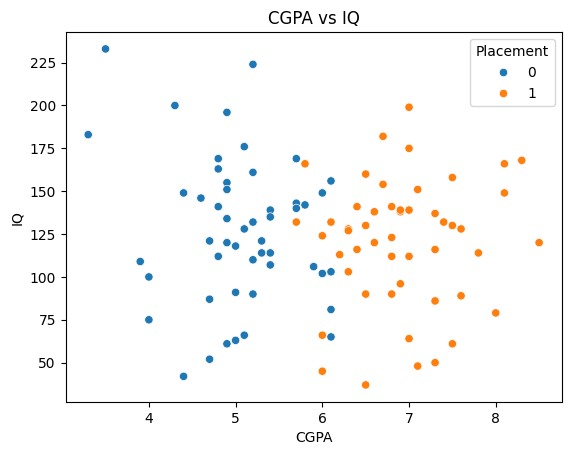

In [888]:
sns.scatterplot(x="CGPA", y="IQ", hue="Placement", data=dataset)
plt.title("CGPA vs IQ")
plt.show()

In [889]:
x = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [890]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=12)

In [891]:
from sklearn.svm import SVC

In [892]:
sc = SVC(kernel='linear')
sc.fit(x_train, y_train)

,C,1.0
,kernel,'linear'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [893]:
sc.score(x_test, y_test)*100 , sc.score(x_train, y_train)*100

(90.0, 92.5)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


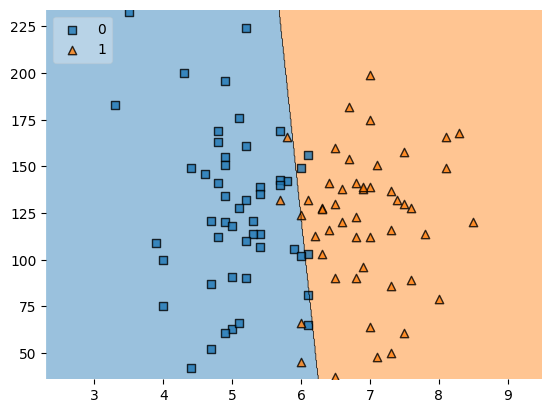

In [894]:
plot_decision_regions(x, y, clf=lr, legend=2)
plt.show()

In [895]:
dataset = pd.read_csv(r"/Users/adityagoyal/Downloads/Dataset/polynomial_classification.csv")
dataset.head()

,x1,x2,label
0,0.160594,0.482602,1
1,1.198440,-0.542104,0
2,-0.618907,0.728517,0
3,1.070839,-0.340617,0
4,0.843196,-0.502865,0


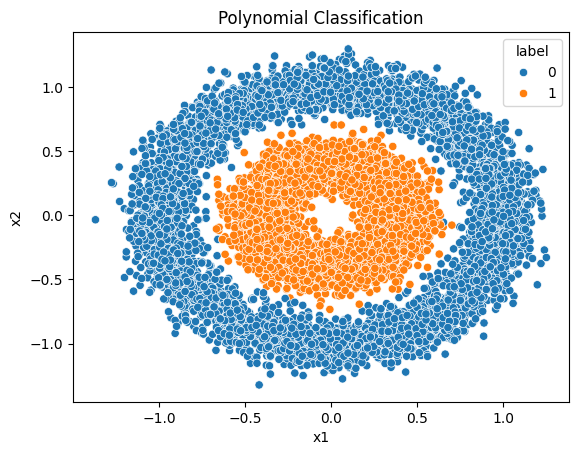

In [896]:
sns.scatterplot(x="x1", y="x2", hue="label", data=dataset)
plt.title("Polynomial Classification")
plt.xlabel("x1")
plt.ylabel("x2")
plt.legend(title="label")
plt.show()


In [897]:
x = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [898]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

##### kernel function
1. linear_kernel = lambda x1, x2: np.dot(x1, x2)
2. polynomial_kernel = lambda x1, x2, p: (1 + np.dot(x1, x2)) ** p
3. rbf_kernel = lambda x1, x2, gamma: np.exp(-gamma * np.linalg.norm(x1 - x2) ** 2)
4. sigmoid_kernel = lambda x1, x2, beta: np.tanh(beta * np.dot(x1, x2))
5. precomputed_kernel = lambda x1, x2: np.dot(x1, x2)

In [899]:
from sklearn.svm import SVC

#### Linear kernel
is a type of kernel function used in SVMs that computes the linear combination of the input features. It is defined as:

K(x, y) = <x, y>

where:
- K(x, y) is the kernel function
- <x, y> is the dot product of the input features

The linear kernel can be used for linear classification tasks and is particularly useful when the data is linearly separable.


In [900]:
svm_model = SVC(kernel="linear")
svm_model.fit(x_train, y_train)


,C,1.0
,kernel,'linear'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


<Axes: >

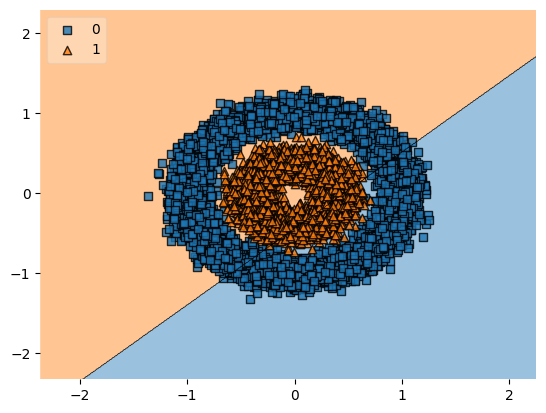

In [901]:
plot_decision_regions(x, y, clf=svm_model, legend=2)

#### Polynomial Kernel
is a type of kernel function used in SVMs that computes the polynomial of the dot product of the input features. It is defined as:

K(x, y) = (<x, y> + c)^d

where:
- K(x, y) is the kernel function
- <x, y> is the dot product of the input features
- c is a constant term
- d is the degree of the polynomial

The polynomial kernel can be used for non-linear classification tasks and is particularly useful when the data is not linearly separable.

In [902]:
svm_model.score(x_test, y_test)*100 , svm_model.score(x_train, y_train)*100

(59.45, 60.5625)

In [903]:
sv = SVC(kernel = "poly")
sv.fit(x_train, y_train)

,C,1.0
,kernel,'poly'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


<Axes: >

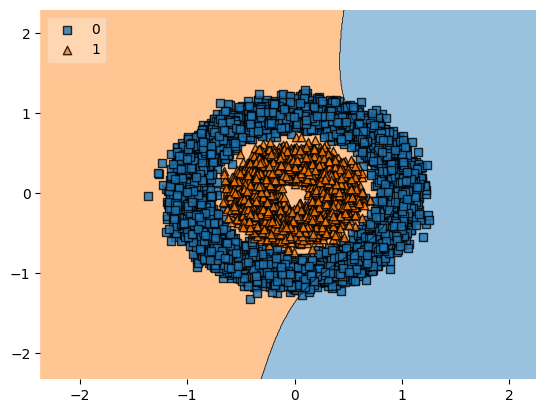

In [904]:
plot_decision_regions(x, y, clf=sv, legend=2)

In [905]:
sv.score(x_test, y_test)*100 , sv.score(x_train, y_train)*100

(62.849999999999994, 64.64999999999999)

#### RBF kernel
is a type of kernel function used in SVMs that maps the input features into a higher-dimensional space. It is defined as:

K(x, y) = exp(-γ * ||x - y||^2)

where:
- K(x, y) is the kernel function
- ||x - y|| is the Euclidean distance between the input features
- γ is a scaling factor

The RBF kernel is particularly useful for non-linear classification tasks and can handle cases where the data is not linearly separable.


In [906]:
sv = SVC(kernel = "rbf")
sv.fit(x_train, y_train)

,C,1.0
,kernel,'rbf'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [907]:
sv.score(x_test, y_test)*100 , sv.score(x_train, y_train)*100

(99.85000000000001, 99.88749999999999)

<Axes: >

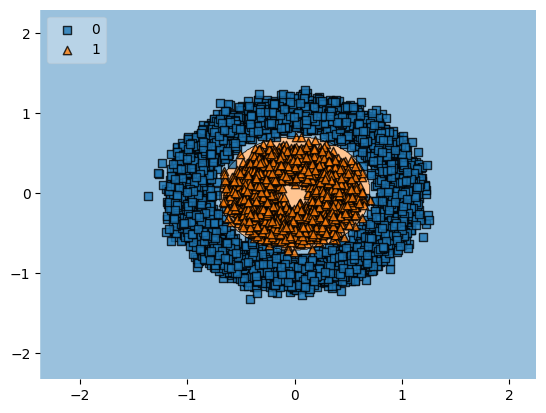

In [908]:
plot_decision_regions(x, y, clf=sv, legend=2)

#### Sigmoid kernel
is a type of kernel function used in SVMs that applies the sigmoid function to the dot product of the input features. It is defined as:

K(x, y) = tanh(α * <x, y> + c)

where:
- K(x, y) is the kernel function
- <x, y> is the dot product of the input features
- α is a scaling factor
- c is a constant term

The sigmoid kernel can be used for non-linear classification tasks and is particularly useful when the data is not linearly separable.


In [909]:
sv = SVC(kernel = "sigmoid")
sv.fit(x_train, y_train)

,C,1.0
,kernel,'sigmoid'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [910]:
sv.score(x_test, y_test)*100 , sv.score(x_train, y_train)*100

(50.2, 51.025)

<Axes: >

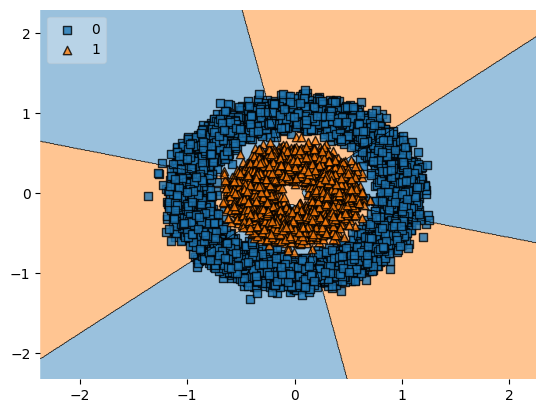

In [911]:
plot_decision_regions(x, y, clf=sv, legend=2)

In [912]:
# Compute the Gram matrix for training data using a linear kernel
K_train = np.dot(x_train, x_train.T)

sv = SVC(kernel="precomputed")
sv.fit(K_train, y_train)

,C,1.0
,kernel,'precomputed'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [913]:
# Compute Gram matrix for test data
K_test = np.dot(x_test, x_train.T)

sv.score(K_test, y_test)*100 , sv.score(K_train, y_train)*100

(59.45, 60.5625)

In [914]:
# plot_decision_regions(x, y, clf=sv)
# plt.show()
# The error occurs because your sv model is an SVC with kernel="precomputed", which expects a Gram (kernel) matrix as input, not the raw feature matrix x. You should pass the precomputed kernel matrix (e.g., K_train for training data or K_test for test data) to plot_decision_regions.X has 2 features, but SVC is expecting 8000 features as input.Output



### precomputed_kernel
is a kernel that is computed beforehand and passed to the SVC model.
in the case of SVC, we can use the precomputed kernel by setting the kernel parameter to "precomputed" and passing the kernel matrix to the fit method. in this case, the kernel matrix should be computed using the training data.


### Support Vector Regression :

Support Vector Regression (SVR) is a type of Support Vector Machine (SVM) used for regression tasks. It aims to find a function that deviates from the actual target values by a value no greater than a specified margin (epsilon). The main idea is to use the same principles as SVM for classification, but instead, we are interested in predicting continuous values.

The SVR model is defined as:

f(x) = <w, x> + b

where:
- f(x) is the predicted output
- <w, x> is the dot product of the weight vector w and the input features x
- b is the bias term

The optimization problem for SVR is to minimize the following loss function:

L = 1/2 ||w||^2 + C * Σ(max(0, |y_i - f(x_i)| - ε))

where:
- C is a regularization parameter
- ε is the margin of tolerance
- y_i is the actual target value

SVR can use different kernel functions (e.g., linear, polynomial, RBF) to handle non-linear relationships in the data.


we use svr (Support Vector Regression) to predict continuous values in our dataset. SVR is particularly useful when dealing with non-linear relationships and can be adapted to various kernel functions to improve performance.
we use svm against non-linear relationships in our dataset because it can effectively capture complex patterns and interactions between features.


In [915]:
dataset = pd.read_csv("/Users/adityagoyal/Downloads/Dataset/cgpa.csv")
dataset.head()

,cgpa,package
0,6.89,3.26
1,5.12,1.98
2,7.82,3.25
3,7.42,3.67
4,6.94,3.57


<Axes: xlabel='cgpa', ylabel='package'>

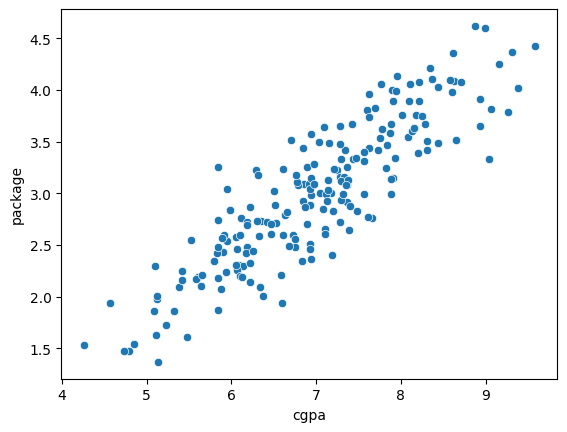

In [916]:
sns.scatterplot(x = "cgpa", y = "package", data=dataset)

In [917]:
x = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [918]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)   

In [919]:
from sklearn.svm import SVR
model = SVR(kernel='rbf')
model.fit(X_train, y_train)

,kernel,'rbf'
,degree,3
,gamma,'scale'
,coef0,0.0
,tol,0.001
,C,1.0
,epsilon,0.1
,shrinking,True
,cache_size,200
,verbose,False
,max_iter,-1


In [920]:
model.score(X_test, y_test)*100 , model.score(X_train, y_train)*100

(75.94945442913422, 78.16909319813372)

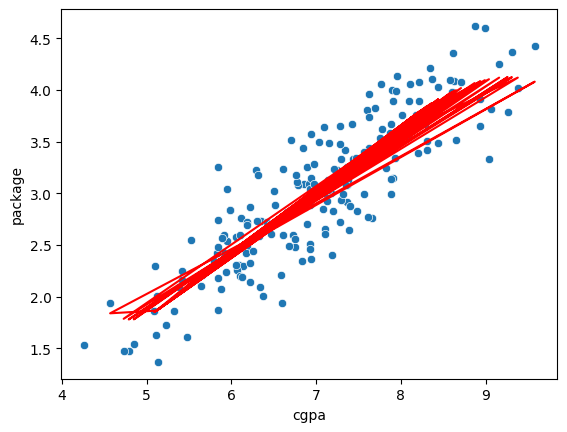

In [921]:
sns.scatterplot(x = "cgpa", y = "package", data=dataset)
plt.plot(X_train.flatten(), model.predict(X_train), color='red')
plt.show()

In [922]:
from sklearn.svm import SVR
model = SVR(kernel='linear')
model.fit(X_train, y_train)

,kernel,'linear'
,degree,3
,gamma,'scale'
,coef0,0.0
,tol,0.001
,C,1.0
,epsilon,0.1
,shrinking,True
,cache_size,200
,verbose,False
,max_iter,-1


In [923]:
model.score(X_test, y_test)*100 , model.score(X_train, y_train)*100

(77.06668029575161, 77.45351616879694)

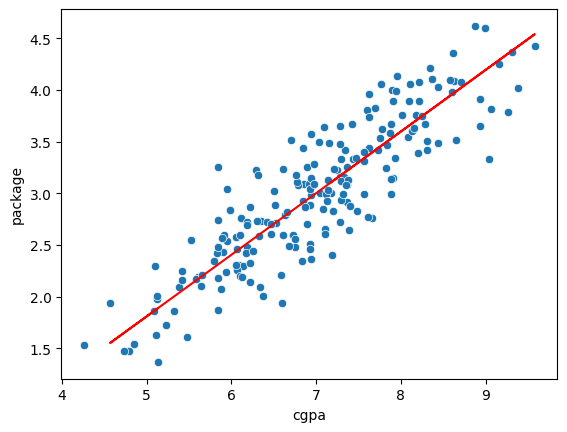

In [924]:
sns.scatterplot(x = "cgpa", y = "package", data=dataset)
plt.plot(X_train.flatten(), model.predict(X_train), color='red')
plt.show()

In [925]:
from sklearn.svm import SVR
model = SVR(kernel='poly', degree=3)
model.fit(X_train, y_train)

,kernel,'poly'
,degree,3
,gamma,'scale'
,coef0,0.0
,tol,0.001
,C,1.0
,epsilon,0.1
,shrinking,True
,cache_size,200
,verbose,False
,max_iter,-1


In [926]:
model.score(X_test, y_test)*100 , model.score(X_train, y_train)*100

(72.30726359559661, 73.70560943768257)

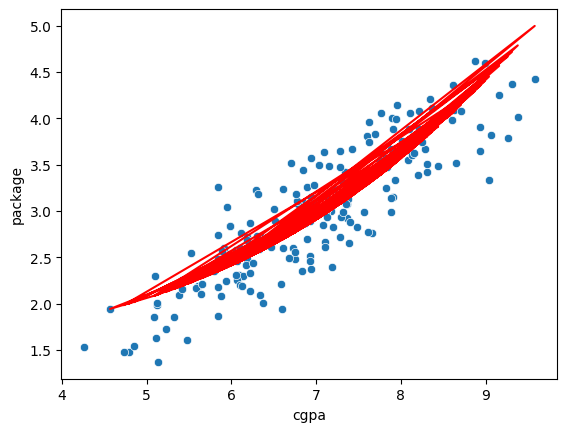

In [927]:
sns.scatterplot(x = "cgpa", y = "package", data=dataset)
plt.plot(X_train.flatten(), model.predict(X_train), color='red')
plt.show()

In [928]:
from sklearn.svm import SVR
model = SVR(kernel='sigmoid')
model.fit(X_train, y_train)

,kernel,'sigmoid'
,degree,3
,gamma,'scale'
,coef0,0.0
,tol,0.001
,C,1.0
,epsilon,0.1
,shrinking,True
,cache_size,200
,verbose,False
,max_iter,-1


In [929]:
model.score(X_test, y_test)*100 , model.score(X_train, y_train)*100

(-0.12751631607434977, -0.08676628025094946)

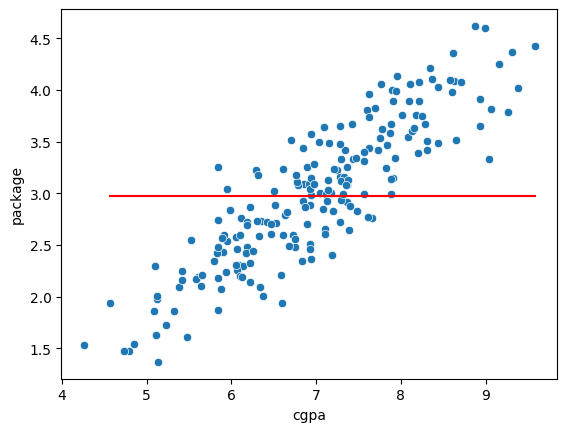

In [930]:
sns.scatterplot(x = "cgpa", y = "package", data=dataset)
plt.plot(X_train.flatten(), model.predict(X_train), color='red')
plt.show()

In [931]:
dataset = pd.read_csv(r"/Users/adityagoyal/Downloads/Dataset/Position_Salaries.csv")
dataset.head(3)

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000


In [932]:
dataset.drop(columns=["Position"], inplace=True)

In [933]:
dataset.shape

(10, 2)

In [934]:
x = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

<Axes: xlabel='Level', ylabel='Salary'>

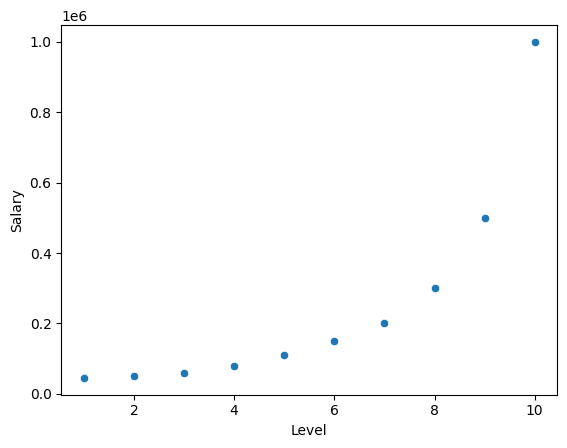

In [935]:
sns.scatterplot(x="Level", y="Salary", data=dataset)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [940]:
from sklearn.svm import SVR
sv = SVR(kernel="rbf")
sv.fit(X_train, y_train)
sv.score(X_test, y_test)*100 , sv.score(X_train, y_train)*100

(-41.52867905765583, -14.546797158292769)

In [941]:
sv = SVR(kernel="linear")
sv.fit(X_train, y_train)
sv.score(X_test, y_test)*100 , sv.score(X_train, y_train)*100

(-41.474872037530865, -14.521504453145884)

In [942]:
sv = SVR(kernel="sigmoid")
sv.fit(X_train, y_train)
sv.score(X_test, y_test)*100 , sv.score(X_train, y_train)*100

(-41.53116790870624, -14.547695376300428)

In [944]:
sv = SVR(kernel="poly", degree=3)
sv.fit(X_train, y_train)
sv.score(X_test, y_test)*100 , sv.score(X_train, y_train)*100

(-39.42794958376392, -13.412146755309507)

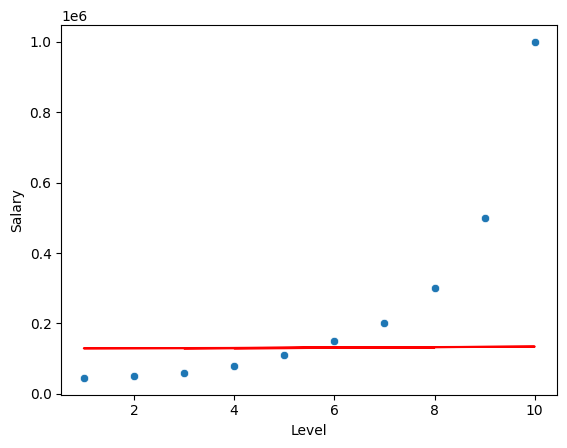

In [945]:
sns.scatterplot(x="Level", y="Salary", data=dataset)
plt.plot(X_train, sv.predict(X_train), color='red')
plt.show()

svr not working properly in this case because the data is not linearly separable. Consider using a different kernel or a different model altogether.